In [1]:
import cv2
import tensorflow as tf
import sys

sys.path.append("../src")
from tensorflow_wavelets.utils.models import *
from tensorflow_wavelets.utils.mse import *
from tensorflow_wavelets.utils.data import *

from matplotlib import pyplot as plt
import numpy as np


In [2]:
num_samples = 32
wavelet = "db2"
x = np.linspace(0, 2 * np.pi, num_samples)
signal = np.sin(5 * x).astype(np.float32)  # 5 Hz sine wave

# Expand dimensions to match model input requirements
signal_ex1 = np.expand_dims(signal, axis=-1)  # Add channel dimension
signal_ex2 = np.expand_dims(signal_ex1, axis=0)  # Add batch dimension

print(signal.shape)
print(signal_ex1.shape)
print(signal_ex2.shape)

(32,)
(32, 1)
(1, 32, 1)


In [3]:
import pywt

coeffs = pywt.dwt(signal, wavelet)  # Returns (approximation, detail) coefficients
cA, cD = coeffs  # Approximation and detail coefficients
print(f"{cA.shape=} {cD.shape=}")

cA.shape=(17,) cD.shape=(17,)


In [4]:
dwt = DWT.DWT1D(wavelet_name=wavelet)(tf.dtypes.cast(signal_ex2, tf.float32))
print(f"{dwt.shape=}")
t_cA = dwt[0, :, 0]
t_cD = dwt[0, :, 1]

dwt.shape=TensorShape([1, 17, 2])


In [5]:
print(np.allclose(cA, t_cA, atol=1e-3))
print(np.allclose(cD, t_cD, atol=1e-3))

True
True


In [6]:
idwt = DWT.IDWT1D(wavelet_name=wavelet)(tf.dtypes.cast(dwt, tf.float32))
print(f"{idwt.shape=}")


idwt.shape=TensorShape([1, 32, 1])


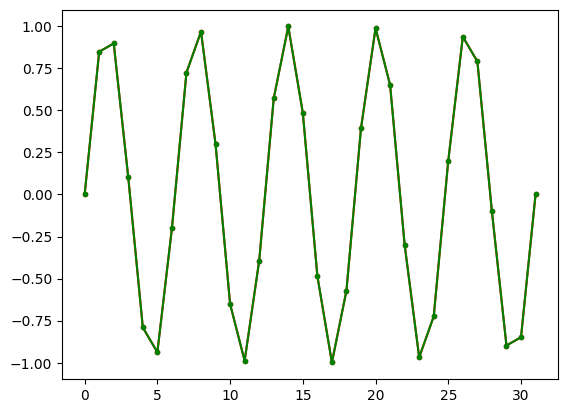

In [7]:
plt.plot(idwt[0, :], **{'color': 'r', 'marker': '.'})
plt.plot(signal, **{'color': 'g', 'marker': '.'})


In [8]:
reconstructed = idwt[0,: ,:].numpy().flatten()
print(np.array_equal(reconstructed, signal))
print(np.allclose(reconstructed, signal, atol=1e-05))
print(abs(reconstructed - signal).max())


False
True
1.1920929e-07


In [9]:
def create_sig(channel_count: int):
    num_samples = 32
    x = np.linspace(0, 2 * np.pi, num_samples)
    signal = np.sin(5 * x).astype(np.float32)  # 5 Hz sine wave
    return np.repeat(signal[None, :, None], repeats=channel_count, axis=-1)

for i in range(1, 10):
    signal = create_sig(i)
    print(f"iter {i} ... with Signal shape {signal.shape=}")
    dwt = DWT.DWT1D(wavelet_name="db2")(tf.dtypes.cast(create_sig(i), tf.float32))
    print(f"{dwt.shape=}")
    idwt = DWT.IDWT1D(wavelet_name="db2")(tf.dtypes.cast(dwt, tf.float32))
    print(f"{idwt.shape=}\n")

iter 1 ... with Signal shape signal.shape=(1, 32, 1)
dwt.shape=TensorShape([1, 17, 2])
idwt.shape=TensorShape([1, 32, 1])

iter 2 ... with Signal shape signal.shape=(1, 32, 2)
dwt.shape=TensorShape([1, 17, 4])
idwt.shape=TensorShape([1, 32, 2])

iter 3 ... with Signal shape signal.shape=(1, 32, 3)
dwt.shape=TensorShape([1, 17, 6])
idwt.shape=TensorShape([1, 32, 3])

iter 4 ... with Signal shape signal.shape=(1, 32, 4)
dwt.shape=TensorShape([1, 17, 8])
idwt.shape=TensorShape([1, 32, 4])

iter 5 ... with Signal shape signal.shape=(1, 32, 5)
dwt.shape=TensorShape([1, 17, 10])
idwt.shape=TensorShape([1, 32, 5])

iter 6 ... with Signal shape signal.shape=(1, 32, 6)
dwt.shape=TensorShape([1, 17, 12])
idwt.shape=TensorShape([1, 32, 6])

iter 7 ... with Signal shape signal.shape=(1, 32, 7)
dwt.shape=TensorShape([1, 17, 14])
idwt.shape=TensorShape([1, 32, 7])

iter 8 ... with Signal shape signal.shape=(1, 32, 8)
dwt.shape=TensorShape([1, 17, 16])
idwt.shape=TensorShape([1, 32, 8])

iter 9 ... w